In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [0]:
import seaborn as sns

In [0]:
dataset=pd.read_csv('project_data.csv')

In [0]:
C1data=dataset[dataset["Class"]==1]
C0data=dataset[dataset["Class"]==0]

In [0]:
C0data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
5,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
6,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
7,10.0,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,0.227666,-0.242682,1.205417,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
8,11.0,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,-0.773657,0.323387,-0.011076,-0.178485,-0.655564,-0.199925,0.124005,-0.980496,-0.982916,-0.153197,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
9,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,1.151087,0.844555,0.792944,0.370448,-0.734975,0.406796,-0.303058,-0.155869,0.778265,2.221868,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0


# ( 미국의 결제 시스템에 대해 사전조사를 진행 )

1. 삼성증권사의 "Future of Payments: 미국편" 자료를 참고


미국의 경우 결제 시스템이 과정에 다음과 같은 참여자가 있다.

- 카드회원: 카드를 사용하여 재화나 서비스를 구매하는 소비자
- 가맹점: 재화나 서비스의 판매자로 "카드번호, 구매 금액, 가맹점 정보" 등을 암호화 하여 매입사로 전송한다. 
- 매입사/처리사: 거래에 대해 가맹점이 지는 유동성 리스크와 환불/결제 취소 리스크를 매입한다. 
- 네트워크사/브랜드사
- 발급사
- ISO / ISV

결제 프로세스는 크게 승인-청산-결제 로 이뤄지는데 
우리는 사용자가 가맹점에서 카드를 사용한 후 가맹점이 매입사로 암호화된 정보를 보내
승인 과정을 거칠 때 부정 사용인지 정상 사용인지 판별 해야 한다.



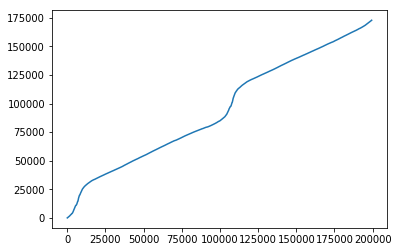

In [0]:
plt.plot(dataset["Time"],)

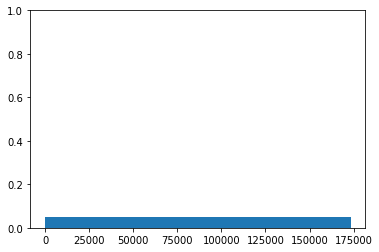

In [0]:
sns.rugplot(dataset["Time"])

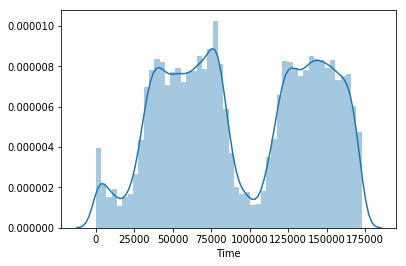

In [0]:
sns.distplot(dataset["Time"],kde=True) #kde 표시 기능이 있어서 사용했다.

두 가지 그래프를 그려본 결과 러그 플롯은 정보를 알아보기에 용이하지 않다고 느꼈다.

distribution plot에서 시간에 따른 카드 사용 빈도를 알아볼 수 있을거라고 예상했다. 

따라서 카드 사용시간이 현저히 떨어진 시간, 즉 급격하게 곡선을 그리며 감소한 부분은
밤이거나, 휴일이거나 라고 예상했다. 

또 늦은 시간, 즉 밤일 때 부정거래가 많이 일어나지 않을까 예상했다.

우선 의미 있는 feature를 찾아야 한다. 28개의 V1~V28과 time, amount까지 30개의 feature가 있다고 할 수 있다.

또 0과 1이 얼마나 많은지 비교해야한다. 한 쪽 데이터가 너무 많으면 학습 시 모든 데이터를 특정 클래스로 학습할 경향이 커진다.


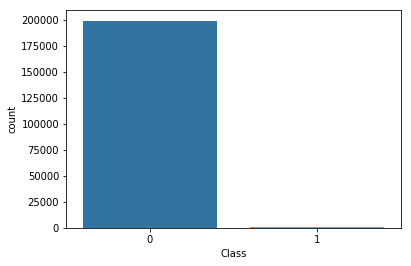

In [0]:
sns.countplot(x="Class", data=dataset)

countplot을 사용하여 클래스 별로 데이터가 얼마나 있는지 조사한 결과 0이 1보다 확연히 많은 것을 알 수 있다. 1에 해당하는 데이터를 임의로 만들어줘야한다.

"데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.

이렇게 각 클래스에 속한 데이터의 갯수의 차이에 의해 발생하는 문제들을 비대칭 데이터 문제(imbalanced data problem)이라고 한다."

- 데이터 사이언스 스쿨에서 참조

이를 해결하기 위한 방법으로는 
- 다수 클래스 데이터에서 일부만 사용하는 언더 샘플링
- 소수 클래스 데이터를 증가시키는 오버 샘플링
- 복합 샘플링

이 있다.

In [0]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.4.3)


In [0]:
#다수의 데이터에서 현재 존재하는 부정 거래의 양과 비슷하게 데이터를 뽑을 것이다.
#따라서 Random Under-sampling을 사용할 것이다. 즉 사용할 것만 뽑으니까 
#반대로 생각하면 무작위로 데이터를 없앤다고 할 수 있다.

In [0]:
from imblearn.under_sampling import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
C1data.shape

(356, 31)

356개의 부정 거래가 있으니 
365개의 정상 거래를 뽑도록 한다.

---
pandas의 sample()을 사용하여 무작위 표본을 추출


In [0]:
pick_C0data=C0data.sample(356)

In [0]:
pick_C0data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
133659,128971.0,1.755056,-0.293668,-2.358411,0.447876,0.637645,-0.838870,0.627931,-0.474420,0.386247,-0.651359,-0.964744,0.584096,1.852639,-1.178200,0.828274,0.487357,0.010462,0.722102,-0.129479,0.331807,0.258371,0.566766,-0.341781,-1.021235,0.376295,-0.065213,-0.028477,-0.001973,198.00,0
108805,105126.0,-0.508545,0.828992,2.395475,-0.115940,0.140681,-0.247790,0.572974,-0.269000,1.468907,-1.161340,0.356112,-2.442639,1.931709,1.201779,0.617714,-0.345022,0.337700,0.401270,0.465463,0.089560,-0.295809,-0.388444,-0.281373,-0.110252,0.262256,-0.725984,-0.077672,-0.145200,11.27,0
121026,121234.0,0.309198,-3.930320,-1.442045,-0.292264,-1.870882,0.172942,0.112854,-0.166680,-0.405191,0.453902,1.166829,0.512346,0.875566,-0.116298,-0.036349,1.743239,-0.268718,-0.686441,0.454676,1.958028,0.667595,-0.275951,-0.440067,0.801760,-0.851241,-0.594912,-0.167965,0.123443,950.00,0
39170,47193.0,-1.856552,0.833027,0.510424,-0.169264,0.224596,-1.002514,-0.122139,0.789186,-0.825583,-1.320084,-0.270581,0.825998,1.019124,0.089885,0.539726,0.563735,0.297246,-0.670741,-1.147849,-0.219032,-0.007188,-0.504637,-0.049163,0.061231,-0.501612,-0.103565,-0.238053,-0.112733,2.69,0
75191,70445.0,1.085656,0.320936,1.154134,2.551981,-0.568216,-0.047142,-0.354874,0.161772,-0.335471,0.653834,-0.250296,-0.441746,-0.897053,0.306040,1.095281,0.590294,-0.308303,-0.339958,-1.697104,-0.230071,0.182638,0.491663,0.017995,0.374128,0.285139,0.109462,0.022607,0.028633,10.59,0


K-mooc 강의를 듣던 도중 스케일링이라는 것을 알게 되었고 이 데이터에 대해 스케일링 같은 전처리가 필요하는 것을 알게 되었다.

"데이터는 여러 feature값을 가지고 있을 수 있는데, 이 feature들은 각각 값의 범위가 가지각색일 수 있습니다. 

예를 들어 사람의 나이, 몸무게, 월급 등으로 feature가 이루어져있다고 가정해보면 각 feature마다 값의 범위가 다르겠죠. 

이처럼 feature 값의 범위에 많은 차이가 나게 되면 모델의 성능에 영향을 미칠 수 있습니다. 

왜냐하면 머신러닝의 클러스터링, 분류 등의 알고리즘은 데이터 간의 거리를 기반으로 만들어지는 경우가 많기 때문에 특정 feature 값이 큰 경우에는 그 feature가 다른 feature들보다 모델에 더 많은 영향을 주기 때문입니다."

- K-mooc 파이썬을 이용한 기계학습 강의 참고

V1~V28의 경우는 이미 정규화 되어있지만
Time과 Amount 는 정규화가 되지 않았음을 알 수 있다.

따라서 Time과 Amount의 스케일링을 진행한다.

스케일링과 정규화의 차이가 뭘까?

- 스케일링: 모든 자료에 선형 변환을 적용하여 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정이다.

- 정규화: 스케일링과 달리 개별 데이터의 크기를 모두 같게 만들기 위한 변환이다. 따라서 개별 데이터에 대해 서로 다른 변환 계수가 적용된다. 정규화는 다차원 독립 변수 벡터가 있을 때 각 벡터 원소들의 상대적 크기만 중요한 경우에 사용된다.

https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler_time = StandardScaler()
scaler_time.fit(dataset[["Time"]])
stime=pd.DataFrame(scaler_time.transform(dataset[["Time"]]))

In [0]:
stime.shape

(199364, 1)

In [0]:
stime.std()

0    1.000003
dtype: float64

In [0]:
stime.sample(5)

,0
33242,-1.086418
176031,1.275335
112936,0.404176
140557,0.815995
68488,-0.596564


In [0]:
scaler_amount = StandardScaler()
scaler_amount.fit(dataset[["Amount"]])
samount=pd.DataFrame(scaler_amount.transform(dataset[["Amount"]]))

In [0]:
dataset['samount']=samount

In [0]:
dataset['stime']=stime

In [0]:
dataset.drop(['Amount','Time'],axis=1,inplace=True)

In [0]:
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,samount,stime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.241551,-1.997279
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.338692,-1.997279
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.146054,-1.997258
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.072917,-1.997237
4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.329609,-1.997195
5,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.018742,-1.997131
6,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.334782,-1.997089
7,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,0.227666,-0.242682,1.205417,-0.317631,0.725675,-0.815612,0.873936,-0.847789,-0.683193,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,0,0.130502,-1.997068
8,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,0.460230,-0.773657,0.323387,-0.011076,-0.178485,-0.655564,-0.199925,0.124005,-0.980496,-0.982916,-0.153197,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,0,-0.240715,-1.997047
9,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,1.151087,0.844555,0.792944,0.370448,-0.734975,0.406796,-0.303058,-0.155869,0.778265,2.221868,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,0,-0.117107,-1.997026


테스트 데이터와 트레이닝 데이터를 나눈다.

테스트 데이터와 트레이닝 데이터를 나눈 후에 불균형한 데이터를 맞춰주도록 한다.

In [0]:
mask = np.random.rand(len(dataset)) < 0.9
train = dataset[mask]
test = dataset[~mask]

In [0]:
train.shape

(179412, 31)

In [0]:
test.shape

(19952, 31)

In [0]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,samount,stime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.241551,-1.997279
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.338692,-1.997279
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.146054,-1.997258
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.072917,-1.997237
4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.329609,-1.997195


In [0]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [0]:
newC1=train[train["Class"]==1]
newC0=train[train["Class"]==0]

In [0]:
newC0.shape

(179090, 31)

In [0]:
newC1.shape

(322, 31)

모든 데이터의 전처리를 마친 후 나눈 테스트 셋에서 부정 거래가 318개이므로 정상 거래도 318개를 뽑는다.

In [0]:
selected_C0=newC0.sample(318)

In [0]:
selected_C0

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,samount,stime
77036,1.333744,-1.096105,-0.056308,-1.264655,-1.295419,-1.243280,-0.342171,-0.413594,-2.223229,1.389860,-0.319969,-0.640974,0.745887,-0.103743,0.301825,-0.622695,0.624988,-0.585859,-0.003421,-0.098305,-0.461089,-1.224309,0.077515,0.345631,0.268423,-0.495131,-0.012652,0.036763,0,0.134490,-0.384690
24925,0.814557,-0.253057,-0.101004,0.948721,0.350555,1.280484,-0.245015,0.447358,0.491510,-1.027455,0.651821,0.815858,0.219331,-1.509952,0.818437,-1.168579,2.315195,-1.941689,-1.602793,0.028871,0.006776,0.200406,-0.065084,-1.011135,0.210455,0.527845,0.056236,0.047199,0,0.108031,-1.155160
42143,-0.769183,0.490838,2.007946,0.255347,-1.347810,0.019698,-0.284247,0.572488,0.017967,-0.911093,-0.039942,0.987521,0.955270,-0.266750,0.665180,-0.684158,0.872364,-0.758922,0.763339,0.166096,0.157859,0.489535,0.266735,0.706805,-0.815942,1.046669,-0.004722,0.089408,0,-0.053132,-0.894585
78782,-0.774298,1.094571,1.450375,-0.203219,0.350894,-0.292417,0.912416,-0.208594,0.053702,0.661678,2.069171,0.442010,-0.367999,-0.691495,0.561426,0.040448,-0.100540,-0.208038,-0.285810,0.462984,-0.341883,-0.444099,-0.012359,0.158482,-0.244753,0.025257,0.136822,-0.210113,0,-0.278271,-0.363659
130131,-0.877106,1.999401,-3.522441,-1.323421,1.234826,-0.807607,0.705130,0.846215,-0.864392,-0.381293,-0.582294,1.474602,1.308713,1.493681,-1.662558,-0.222895,-0.551304,0.368788,0.490395,-0.229622,0.580456,1.639720,-0.060483,-0.229421,-0.795074,0.118283,0.122198,0.231562,0,-0.325620,0.870681
25407,-0.801915,0.188422,2.184947,-0.635695,-0.949840,0.287662,0.956943,-0.286937,-0.941993,0.112665,-1.338912,-0.546422,0.257475,-0.703239,-0.192898,-1.234650,-0.546071,1.608451,-1.479555,-0.445880,-0.262905,-0.040551,-0.316537,-0.001869,0.575116,-0.322261,-0.140515,-0.192853,0,0.274644,-1.148226
62306,-1.286741,-0.029528,1.788468,1.286601,1.009483,0.185745,-0.191213,0.276537,-0.298680,-0.035746,-0.050469,0.271657,-0.475817,0.033440,-0.560464,-0.419403,-0.129240,0.742675,1.799289,0.174334,0.013567,0.045363,-0.316608,-0.509546,0.599881,-0.091571,-0.108721,0.226272,0,-0.325660,-0.586427
25870,1.380763,-1.006846,0.367999,-2.252716,-1.469572,-0.745981,-0.955476,0.028728,0.393670,-0.036311,0.833244,0.203131,-0.870834,0.409046,1.273762,-1.403477,-0.315922,2.284952,0.195312,-0.521329,-0.235419,-0.178818,-0.046196,-0.021513,0.339190,0.064306,0.034025,0.009839,0,-0.302321,-1.141399
138847,-1.254045,-0.772341,-0.572599,-1.171694,3.015191,3.526421,0.051031,1.068442,0.056501,-0.662350,-0.263744,0.036195,-0.207362,0.294747,0.782865,-0.411544,-0.395106,0.037462,0.148209,0.721153,0.228995,0.249097,0.363144,0.685378,0.053210,-0.249028,0.337188,0.240876,0,0.324758,0.994087
113966,-1.677714,-2.105709,-1.478562,-1.458475,-0.310762,-0.352953,0.870709,-0.177052,-0.077533,0.099379,-1.922829,-0.548850,0.198963,-0.649232,-2.261739,0.654492,0.227965,-1.271332,0.149290,-0.038265,0.555027,1.984873,-0.456745,0.660455,-1.070390,-0.149512,0.606093,-0.484864,0,1.159244,0.628567


In [0]:
selected_C0.reset_index(drop=True, inplace=True)
newC1.reset_index(drop=True, inplace=True)

In [0]:
Rtest=pd.concat([selected_C0, newC1])

In [0]:
Rtest

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,samount,stime
0,1.333744,-1.096105,-0.056308,-1.264655,-1.295419,-1.243280,-0.342171,-0.413594,-2.223229,1.389860,-0.319969,-0.640974,0.745887,-0.103743,0.301825,-0.622695,0.624988,-0.585859,-0.003421,-0.098305,-0.461089,-1.224309,0.077515,0.345631,0.268423,-0.495131,-0.012652,0.036763,0,0.134490,-0.384690
1,0.814557,-0.253057,-0.101004,0.948721,0.350555,1.280484,-0.245015,0.447358,0.491510,-1.027455,0.651821,0.815858,0.219331,-1.509952,0.818437,-1.168579,2.315195,-1.941689,-1.602793,0.028871,0.006776,0.200406,-0.065084,-1.011135,0.210455,0.527845,0.056236,0.047199,0,0.108031,-1.155160
2,-0.769183,0.490838,2.007946,0.255347,-1.347810,0.019698,-0.284247,0.572488,0.017967,-0.911093,-0.039942,0.987521,0.955270,-0.266750,0.665180,-0.684158,0.872364,-0.758922,0.763339,0.166096,0.157859,0.489535,0.266735,0.706805,-0.815942,1.046669,-0.004722,0.089408,0,-0.053132,-0.894585
3,-0.774298,1.094571,1.450375,-0.203219,0.350894,-0.292417,0.912416,-0.208594,0.053702,0.661678,2.069171,0.442010,-0.367999,-0.691495,0.561426,0.040448,-0.100540,-0.208038,-0.285810,0.462984,-0.341883,-0.444099,-0.012359,0.158482,-0.244753,0.025257,0.136822,-0.210113,0,-0.278271,-0.363659
4,-0.877106,1.999401,-3.522441,-1.323421,1.234826,-0.807607,0.705130,0.846215,-0.864392,-0.381293,-0.582294,1.474602,1.308713,1.493681,-1.662558,-0.222895,-0.551304,0.368788,0.490395,-0.229622,0.580456,1.639720,-0.060483,-0.229421,-0.795074,0.118283,0.122198,0.231562,0,-0.325620,0.870681
5,-0.801915,0.188422,2.184947,-0.635695,-0.949840,0.287662,0.956943,-0.286937,-0.941993,0.112665,-1.338912,-0.546422,0.257475,-0.703239,-0.192898,-1.234650,-0.546071,1.608451,-1.479555,-0.445880,-0.262905,-0.040551,-0.316537,-0.001869,0.575116,-0.322261,-0.140515,-0.192853,0,0.274644,-1.148226
6,-1.286741,-0.029528,1.788468,1.286601,1.009483,0.185745,-0.191213,0.276537,-0.298680,-0.035746,-0.050469,0.271657,-0.475817,0.033440,-0.560464,-0.419403,-0.129240,0.742675,1.799289,0.174334,0.013567,0.045363,-0.316608,-0.509546,0.599881,-0.091571,-0.108721,0.226272,0,-0.325660,-0.586427
7,1.380763,-1.006846,0.367999,-2.252716,-1.469572,-0.745981,-0.955476,0.028728,0.393670,-0.036311,0.833244,0.203131,-0.870834,0.409046,1.273762,-1.403477,-0.315922,2.284952,0.195312,-0.521329,-0.235419,-0.178818,-0.046196,-0.021513,0.339190,0.064306,0.034025,0.009839,0,-0.302321,-1.141399
8,-1.254045,-0.772341,-0.572599,-1.171694,3.015191,3.526421,0.051031,1.068442,0.056501,-0.662350,-0.263744,0.036195,-0.207362,0.294747,0.782865,-0.411544,-0.395106,0.037462,0.148209,0.721153,0.228995,0.249097,0.363144,0.685378,0.053210,-0.249028,0.337188,0.240876,0,0.324758,0.994087
9,-1.677714,-2.105709,-1.478562,-1.458475,-0.310762,-0.352953,0.870709,-0.177052,-0.077533,0.099379,-1.922829,-0.548850,0.198963,-0.649232,-2.261739,0.654492,0.227965,-1.271332,0.149290,-0.038265,0.555027,1.984873,-0.456745,0.660455,-1.070390,-0.149512,0.606093,-0.484864,0,1.159244,0.628567


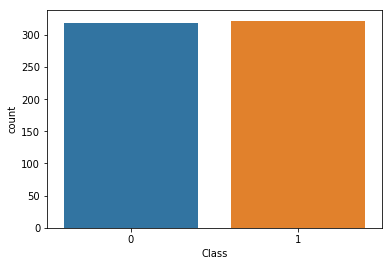

In [0]:
sns.countplot(x="Class", data=Rtest)

한 쪽 클래스에 쏠리지 않은 테스트 데이터를 만들었다.

---
Rtest를 사용해서 모델들중에 어떤 모델이 가장 학습에 적합한지 알아본다. 

---



먼저 project_data는 클래스가 알려져있는 data이다.
따라서 지도학습 모델을 사용한다.

28차원의 데이터를 다 사용해야할까?
유용한 feature를 알아보기 위해 class와의 상관도도 알아보도록 한다.

차원 축소 방법도 고려한다.(PCA 또는 LDA가 있다.)- 수업시간에 배운 PCA를 사용하자!

사용할 수 있는 지도학습 모델들은

-  Random Forests
-  SVM (Support Vector Machine)
-  KNN (K Nearest Neighbor)
-  DNN (Deep Neural Networks)
-  Logistic Regression Algorithm
-  LDA (Linear Discriminant Analysis)

등이라고 생각했다. 

In [0]:
correlation=Rtest.corr()
correlation=correlation[['Class']]
correlation

,Class
V1,-0.430102
V2,0.481533
V3,-0.553950
V4,0.706607
V5,-0.372313
V6,-0.396871
V7,-0.483242
V8,0.083204
V9,-0.552927
V10,-0.630346


상관계수의 절댓값이 클수록 많은 영향을 끼친다.
양의 상관계수라면 커질 때 커지고
음의 상관계수라면 커질 때 작아진다는 것을 의미한다.

클래스는 0,1 두 가지인데 클래스 값과
나머지 각각의 feature가 선형관계를 갖고있다면 feature가 늘어날 때 0과 1이 될 확률이 늘어남을 의미한다.

In [0]:
pX = Rtest.drop('Class', axis=1)
py = Rtest['Class']

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca=PCA(n_components=2)
pca.fit(pX.values)
pX_transformed = pca.transform(pX.values)

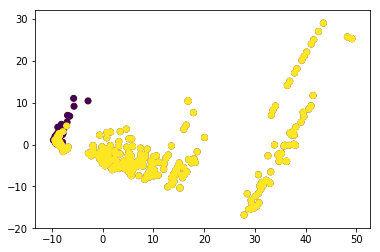

In [0]:
plt.scatter(pX_transformed[:, 0], pX_transformed[:, 1], c=(py == 0), label='No Fraud')
plt.scatter(pX_transformed[:, 0], pX_transformed[:, 1], c=(py == 1), label='Fraud')

그런데 특이값들을 없애는 것이 좋을까? 그 특성들도 저장하는 나름의 이유가 있을 것이다. 하지만 그 값들이 모델의 정확도나 수행률에 직/간접적으로 영향을 주는 것은 분명하다.

https://datascience.stackexchange.com/questions/19849/is-it-good-to-remove-outliers-from-the-dataset

누군가 나와 비슷한 질문을 했는데 
답변이 달리길 그것을 사용자가 어떤 목적을 가지고 ML을 하느냐에 따라 다르다고 했다. 

예를 들면 병원 데이터는 평균값만 보면 안된다. 100 수치 중에 50이 평균값이면
0인 사람과 50인 사람이 한 번에 묶이게 되고, 또 51인 사람과 100인 사람이 한 번에 묶이게 된다. 가장 낮은 군과 가장 높은 군은 다르게 치료되어야 할 필요성이 있기 때문에 이 경우는 지우면 안된다.

하지만 지금 학습하는 경우에는 그런 경우는 없다고 판단하여 과하게 크거나 과하게 작은 값을 가진 데이터들은 지우도록 한다.

In [0]:
Q1 = Rtest.quantile(0.25)
Q3 = Rtest.quantile(0.75)
IQR = Q3 - Q1

Rtrain = Rtest[~((Rtest < (Q1 - 2.5 * IQR)) |(Rtest > (Q3 + 2.5 * IQR))).any(axis=1)]

조정한 값들을 PCA 한 후 scatter plot를 그려보자.

In [0]:
X = Rtrain.drop('Class', axis=1)
y = Rtrain['Class']

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
pca=PCA(n_components=2)
pca.fit(X.values)
X_transformed = pca.transform(X.values)

In [0]:
X_transformed.shape

(460, 2)

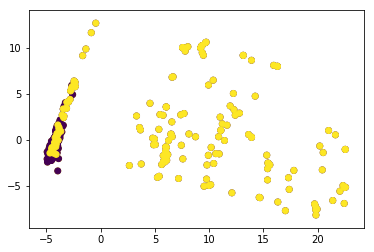

In [0]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=(y == 0), label='No Fraud')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=(y == 1), label='Fraud')


노란색 점이 부정 거래이고 다른 색의 점이 정상 거래인데 이상한 결과가 나온다.

찾아본 결과 PCA 말고 T-SEN이라는 차원축소 방법이 있는데 더 잘 작동된다고 하여 그걸 사용해보기로 했다.

In [0]:
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)


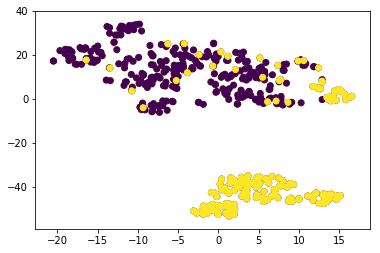

In [0]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 0), label='No Fraud')
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y == 1), label='Fraud')

In [0]:
X_reduced_tsnedf=pd.DataFrame(X_reduced_tsne)
X_reduced_tsnedf

,0,1
0,-17.195532,23.406160
1,6.458973,6.025308
2,-3.698244,19.458836
3,-2.217165,14.930120
4,-8.829377,5.220640
5,-4.384853,25.081095
6,-1.189131,20.107513
7,-0.928568,7.730726
8,-11.257627,31.386187
9,-7.402841,-3.530778


Text(0.5, 1.0, 't-SNE')

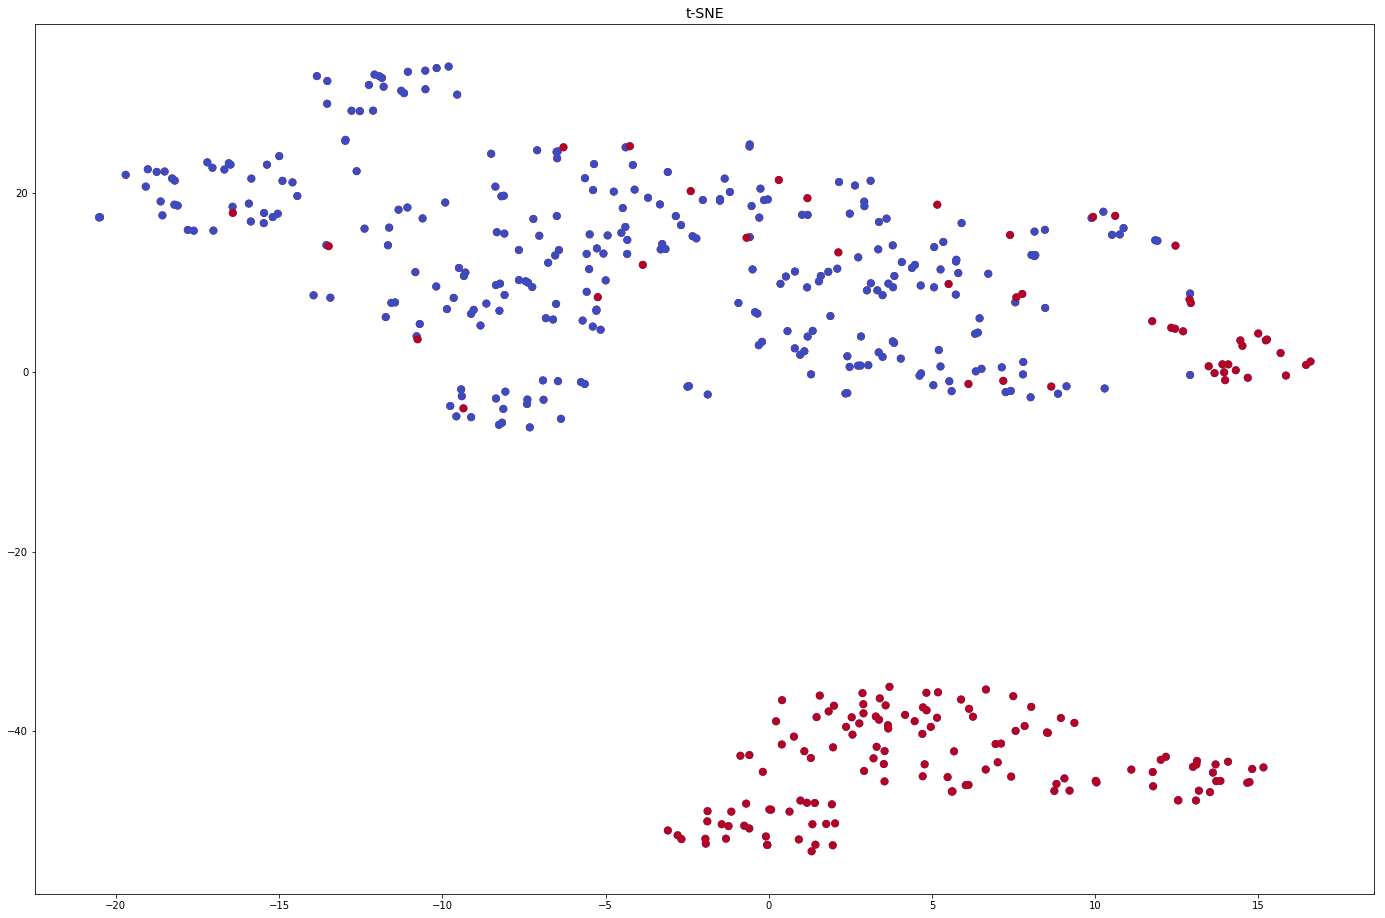

In [0]:
f, ax = plt.subplots(figsize=(24,16))

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

#학습
test set 과 traning set으로 나눠서 학습시킨다.


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = Rtrain.drop('Class', axis=1)
y = Rtrain['Class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [0]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (368, 30) (92, 30) 

Y_shapes:
 Y_train: Y_validation:
 (368,) (92,)


모델의 성능을 검사하는 데에는 다양한 방법이 있다.

- Hold out
- Random subsampling
- Cross validation
- stratified sampling
- Bootstrap

이 중에 K-fold Cross validation을 사용한다.
이 방법은 주로 데이터의 양이 적을 때 사용한다.
모든 데이터가 train set도 되고 test set도 되기 때문에 성능을 검사하기 좋을 것이라고 생각했다.

K fold cross validation의 성능은 K번의 실험 성능의 평균으로 도출된다.

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


In [0]:
from sklearn.metrics import roc_auc_score

In [0]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s Cross Validation Score : %f (%f)' % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

LR Cross Validation Score : 95.130749 (0.036922)
LDA Cross Validation Score : 94.621671 (0.042650)
KNN Cross Validation Score : 92.569776 (0.047132)
SVM Cross Validation Score : 94.179738 (0.040841)
RF Cross Validation Score : 95.946945 (0.027003)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

결과를 보면 트레이닝 결과 Random Forest 분류기가 성능이 제일 좋다고 나왔다.


# linear_regression 

모델에 학습 시킨 후 그려보려고 했으나 
Multivariate Linear Regression 시각화를 실패했다..

In [0]:
from sklearn import linear_model

In [0]:
linear_regression=linear_model.LinearRegression()
linear_regression.fit(X=X_train,y=y_train)
prediction_l=linear_regression.predict(X_validation)

In [0]:
linear_regression.score(X_test, y_test)

0.6464345172276584

성능이 너무 낮아서 확률은 계산하지 않는다.

# Random Forest 구현

In [0]:
rfc = RandomForestClassifier(n_estimators=300, max_features=2)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rfc.fit(X_train, y_train)
prediction_r = rfc.predict(X_test)

In [0]:
print(prediction_r==y_test)

136     True
32      True
220     True
289     True
170     True
252     True
236     True
11      True
249     True
81      True
310     True
114     True
84      True
99     False
272     True
254     True
233     True
276     True
306     True
0       True
76      True
291     True
284     True
41      True
231     True
28     False
78      True
88      True
138     True
10      True
       ...  
191     True
307     True
135     True
21      True
161     True
21      True
60      True
214     True
178    False
168    False
96      True
122     True
183     True
27      True
216     True
226     True
278     True
45      True
200     True
301     True
309     True
142    False
297     True
12      True
24      True
14      True
50      True
108     True
250     True
173     True
Name: Class, Length: 92, dtype: bool


test의 결과 정확도는 다음과 같다.

In [0]:
rfc.score(X_test, y_test)

0.9347826086956522

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy is :", accuracy_score(prediction_r, y_test))
print(classification_report(prediction_r, y_test))

Accuracy is : 0.9347826086956522
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        60
           1       0.84      1.00      0.91        32

    accuracy                           0.93        92
   macro avg       0.92      0.95      0.93        92
weighted avg       0.95      0.93      0.94        92



In [0]:
prediction_pro = rfc.predict_proba(X_test)

In [0]:
rf_proba=pd.DataFrame(prediction_pro, columns=['Non_Fraud','Fraud'])

In [0]:
rf_proba

,Non_Fraud,Fraud
0,0.980000,0.020000
1,0.793333,0.206667
2,0.743333,0.256667
3,0.033333,0.966667
4,0.946667,0.053333
5,0.856667,0.143333
6,0.076667,0.923333
7,0.010000,0.990000
8,0.790000,0.210000
9,0.813333,0.186667


In [0]:
rf_proba['Fraud']

0     0.020000
1     0.206667
2     0.256667
3     0.966667
4     0.053333
5     0.143333
6     0.923333
7     0.990000
8     0.210000
9     0.186667
10    0.990000
11    0.973333
12    0.023333
13    0.183333
14    0.120000
15    0.983333
16    0.083333
17    0.120000
18    0.990000
19    0.096667
20    0.220000
21    0.066667
22    0.843333
23    0.136667
24    0.053333
25    0.416667
26    0.053333
27    0.000000
28    0.080000
29    0.063333
        ...   
62    0.016667
63    0.103333
64    0.860000
65    0.083333
66    0.966667
67    0.976667
68    0.080000
69    0.200000
70    0.376667
71    0.070000
72    0.286667
73    0.236667
74    0.993333
75    0.060000
76    0.096667
77    0.056667
78    0.933333
79    0.180000
80    0.090000
81    0.966667
82    0.793333
83    0.170000
84    0.070000
85    1.000000
86    0.040000
87    0.963333
88    0.180000
89    0.140000
90    0.960000
91    0.110000
Name: Fraud, Length: 92, dtype: float64

In [0]:
real_rank=rf_proba['Fraud'].rank(ascending=False,method='max')

# KNN

In [0]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
prediction_k=knn.predict(X_test)

In [0]:
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, prediction_k))

The accuracy score of classification: 0.934782609


In [0]:
prediction_knn = knn.predict_proba(X_test)

In [0]:
print(prediction_k==y_test)

136     True
32      True
220     True
289     True
170     True
252     True
236     True
11      True
249     True
81      True
310     True
114     True
84      True
99     False
272     True
254     True
233     True
276     True
306     True
0       True
76      True
291     True
284     True
41      True
231     True
28     False
78      True
88      True
138     True
10      True
       ...  
191     True
307     True
135     True
21      True
161     True
21      True
60      True
214     True
178    False
168    False
96      True
122     True
183     True
27      True
216     True
226     True
278     True
45      True
200     True
301     True
309     True
142    False
297     True
12      True
24      True
14      True
50      True
108     True
250     True
173     True
Name: Class, Length: 92, dtype: bool


In [0]:
knn_proba=pd.DataFrame(prediction_knn, columns=['Non_Fraud','Fraud'])
knn_proba

,Non_Fraud,Fraud
0,1.0,0.0
1,0.8,0.2
2,0.8,0.2
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0
6,0.0,1.0
7,0.0,1.0
8,0.9,0.1
9,0.8,0.2


# SVM

In [0]:
model = SVC(kernel='linear',C=1, probability=True)
model.fit(X_train, y_train)
prediction_s=model.predict(X_test)

In [0]:
print(prediction_s==y_test)

136     True
32      True
220     True
289     True
170     True
252     True
236     True
11      True
249     True
81      True
310     True
114     True
84      True
99     False
272     True
254     True
233     True
276     True
306     True
0       True
76      True
291     True
284     True
41      True
231     True
28     False
78      True
88      True
138     True
10      True
       ...  
191     True
307     True
135     True
21      True
161     True
21      True
60      True
214     True
178     True
168    False
96      True
122     True
183     True
27      True
216     True
226     True
278     True
45      True
200     True
301     True
309     True
142    False
297     True
12      True
24      True
14      True
50      True
108     True
250     True
173     True
Name: Class, Length: 92, dtype: bool


In [0]:
print("The accuracy score of classification: %.9f"  
      %accuracy_score(y_test, prediction_s))

The accuracy score of classification: 0.945652174


In [0]:
prediction_svm=model.predict_proba(X_test)

In [0]:
svm_proba=pd.DataFrame(prediction_svm, columns=['Non_Fraud','Fraud'])
svm_proba

,Non_Fraud,Fraud
0,9.827106e-01,0.017289
1,7.393370e-01,0.260663
2,7.789996e-01,0.221000
3,2.502916e-02,0.974971
4,9.313565e-01,0.068644
5,9.547312e-01,0.045269
6,9.621479e-03,0.990379
7,7.340856e-14,1.000000
8,9.075658e-01,0.092434
9,8.124857e-01,0.187514


In [0]:
svm_proba['Fraud'].rank(ascending=False, method='min')

0     89.0
1     35.0
2     37.0
3     29.0
4     56.0
5     69.0
6     25.0
7      1.0
8     48.0
9     39.0
10    18.0
11    22.0
12    88.0
13    36.0
14    51.0
15    10.0
16    79.0
17    60.0
18     9.0
19    71.0
20    92.0
21    47.0
22    30.0
23    84.0
24    65.0
25    34.0
26    68.0
27    91.0
28    54.0
29    77.0
      ... 
62    80.0
63    81.0
64    26.0
65    49.0
66    28.0
67     6.0
68    82.0
69    53.0
70    33.0
71    40.0
72    55.0
73    42.0
74     5.0
75    72.0
76    46.0
77    73.0
78    24.0
79    62.0
80    67.0
81    23.0
82    32.0
83    66.0
84    90.0
85    13.0
86    86.0
87     4.0
88    70.0
89    74.0
90    21.0
91    44.0
Name: Fraud, Length: 92, dtype: float64

# 가장 모델 평가에 적합한 것은 Random Forest 라고 결정했다.
일단 SVM이 제일 성능이 높지만 확률값이 이상하다.
따라서 Random Forest의 랭킹은 다음과 같습니다.

In [0]:
real_rank

0     90.0
1     43.0
2     37.0
3     20.0
4     83.0
5     54.0
6     26.0
7     13.0
8     42.0
9     47.0
10    13.0
11    17.0
12    88.0
13    48.0
14    59.0
15    15.0
16    69.0
17    59.0
18    13.0
19    64.0
20    40.0
21    75.0
22    29.0
23    56.0
24    83.0
25    33.0
26    83.0
27    92.0
28    71.0
29    78.0
      ... 
62    91.0
63    62.0
64    28.0
65    69.0
66    20.0
67    16.0
68    71.0
69    45.0
70    35.0
71    74.0
72    36.0
73    39.0
74     9.0
75    79.0
76    64.0
77    80.0
78    24.0
79    50.0
80    67.0
81    20.0
82    32.0
83    52.0
84    74.0
85     5.0
86    86.0
87    22.0
88    50.0
89    55.0
90    23.0
91    60.0
Name: Fraud, Length: 92, dtype: float64

In [0]:
y_test

136    0
32     0
220    0
289    1
170    0
252    0
236    1
11     1
249    0
81     0
310    1
114    1
84     0
99     1
272    0
254    1
233    0
276    0
306    1
0      0
76     0
291    0
284    1
41     0
231    0
28     1
78     0
88     0
138    0
10     0
      ..
191    0
307    0
135    1
21     0
161    1
21     1
60     0
214    0
178    1
168    1
96     0
122    0
183    1
27     0
216    0
226    0
278    1
45     0
200    0
301    1
309    1
142    1
297    0
12     1
24     0
14     1
50     0
108    0
250    1
173    0
Name: Class, Length: 92, dtype: int64